In [2]:
#Notes:
#https://blog.mlq.ai/prompt-engineering-advanced-techniques/
#https://github.com/dair-ai/Prompt-Engineering-Guide/blob/main/guides/prompts-advanced-usage.md

In [1]:
import openai

# Set OpenAI API configuration
openai.api_type = "azure"
openai.api_version = "2023-03-15-preview"
openai.api_key = "abvcc"
openai.api_base = "https://ai-proxy.lab.sam.com"

In [2]:
# Function to generate text embeddings
def generate_text_embedding(text, engine="text-embedding-ada-002"):
    response = openai.Embedding.create(
        input=text,
        engine=engine
    )
    embedding = response["data"][0]["embedding"]
    return embedding

In [3]:
# Define a function to generate responses using OpenAI Chat Completion API
def generate_responses(system_pro,user_pro):
    conversation = [
        {"role": "system", 
             "content": f"System Prompt: \n{system_pro}"},
        {"role": "user", 
             "content": f"User Input: \n{user_pro}"}
    ]
    response = openai.ChatCompletion.create(
        engine="gpt-35-turbo-16k",
        messages=conversation,
        temperature=0.1
    )
    bot_response = response["choices"][0]["message"]["content"]
    return bot_response

In [4]:
# Example
system_pro = " You tell funny jobs on topics provided by User"
user_pro = "Data Science"
generate_responses(system_pro,user_pro)

"Funny Job: Data Science Fiction Writer\n\nJob Description: Are you a data scientist with a wild imagination? Do you love creating stories and exploring the unknown? Then this job is perfect for you! As a Data Science Fiction Writer, your task is to combine your expertise in data analysis with your creative writing skills to craft mind-bending tales set in futuristic worlds where data rules everything. From predicting alien behavior using machine learning algorithms to unraveling mysteries through data visualization, you'll be responsible for creating thrilling and hilarious stories that will keep readers entertained and scratching their heads. So, if you're ready to take data science to a whole new dimension, apply now and let your imagination run wild!"

# Prompt engineering refers to the process of refining a language (or other generative AI) model's input to produce the desired output, without updating the actual weights of the model as you would with fine-tuning.

## Advanced prompt engineering concepts & techniques, including:

## The Basics: Zero Shot and Few Shot prompting
## Chain of Thought (CoT) Prompting
## Self Consistency
## General Knowledge Prompting
## ReAct

# Zero-Shot & Few Shot Prompting

In [8]:
#Zero-Shot Prompts
#Zero-shot prompting refers to simply asking a question or presenting a task to an LLM without providing prior exposure to the task in training.
#With zero-shot prompting, we're expecting the model to respond without providing examples of the desired output or 
#additional context to the task at hand.

# Example
system_pro = " Analyze the sentiment of the following tweet and classify it as positive, negative, or neutral."
user_pro = "Prompt engineering is so fun"
generate_responses(system_pro,user_pro)

'Model Output: \nPositive'

In [11]:
#Few Shot Prompts
#As the name suggests, few shot prompting refers to presenting a model with a task or question along with a few examples of the desired output.

# Example
system_pro = """ 
Analyze the sentiment of the following user text and classify it as positive, negative, or neutral:

Example 1:
User Input: "I like movies"
Output: "Positive"

Example 2:
User Input: "I hate social media posts"
Output: "Negative"
"""

user_pro = "Prompt engineering is so fun"
generate_responses(system_pro,user_pro)

'Output: "Positive"'

## Recent work has demonstrated substantial gains on many NLP tasks and benchmarks by pre-training on a large corpus of text followed by fine-tuning on a specific task. While typically task-agnostic in architecture, this method still requires task-specific fine-tuning datasets of thousands or tens of thousands of examples. By contrast, humans can generally perform a new language task from only a few examples or from simple instructions - something which current NLP systems still largely struggle to do.

## Here we show that scaling up language models greatly improves task-agnostic, few-shot performance, sometimes even reaching competitiveness with prior state-of-the-art fine-tuning approaches.

# Chain of Thought (CoT) Prompting

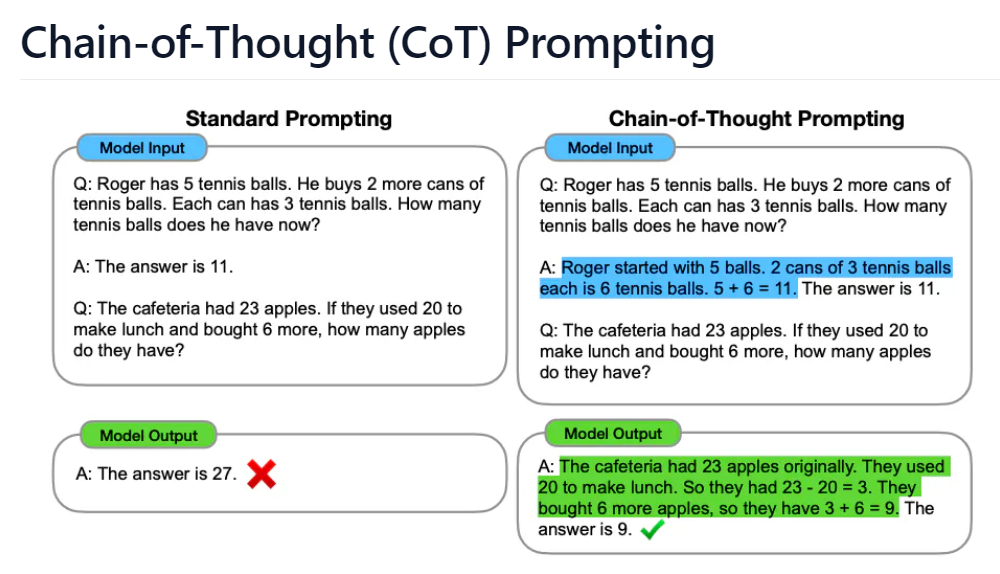

## We explore how generating a chain of thought -- a series of intermediate reasoning steps -- significantly improves the ability of large language models to perform complex reasoning. In particular, we show how such reasoning abilities emerge naturally in sufficiently large language models via a simple method called chain of thought prompting, where a few chain of thought demonstrations are provided as exemplars in prompting.

In [13]:
#Chain of Thought (CoT) Prompting
#Another important technique is chain of thought (CoT) prompting, which is used to use to improve performance on more complex reasoning tasks 
#and facilitate more context-aware responses.

#With CoT prompting, we tell the model to produce a few reasoning steps before it provides the final answer. 
# For example, we could use CoT prompting in the context of customer churn as follows:


In [14]:
# Example
system_pro = "Sove User queries as SME"
user_pro = """Which is a faster way to get to work?
Option 1: Take a 1000 minute bus, then a half hour train, and finally a 10 minute bike ride.
Option 2: Take an 800 minute bus, then an hour train, and finally a 30 minute bike ride."""

generate_responses(system_pro,user_pro)

'As an SME, I would recommend Option 1 as the faster way to get to work. \n\nIn Option 1, you would take a 1000 minute bus, followed by a half-hour train ride, and finally a 10-minute bike ride. This totals to 1000 + 30 + 10 = 1040 minutes.\n\nIn Option 2, you would take an 800 minute bus, followed by an hour-long train ride, and finally a 30-minute bike ride. This totals to 800 + 60 + 30 = 890 minutes.\n\nTherefore, Option 2 would take less time overall, making it the faster way to get to work.'

In [15]:
# Example
system_pro = "Sove User queries as SME"
user_pro = """Which is a faster way to get home?
Option 1: Take an 10 minutes bus, then an 40 minute bus, and finally a 10 minute train.
Option 2: Take a 90 minutes train, then a 45 minute bike ride, and finally a 10 minute bus.
Option 1 will take 10+40+10 = 60 minutes.
Option 2 will take 90+45+10=145 minutes.
Since Option 1 takes 60 minutes and Option 2 takes 145 minutes, Option 1 is faster.

Which is a faster way to get to work?
Option 1: Take a 1000 minute bus, then a half hour train, and finally a 10 minute bike ride.
Option 2: Take an 800 minute bus, then an hour train, and finally a 30 minute bike ride."""

generate_responses(system_pro,user_pro)

'Based on the given information, Option 1 is the faster way to get home and Option 2 is the faster way to get to work.\n\nFor getting home:\nOption 1: 10+40+10 = 60 minutes\nOption 2: 90+45+10 = 145 minutes\n\nSince Option 1 takes 60 minutes and Option 2 takes 145 minutes, Option 1 is faster.\n\nFor getting to work:\nOption 1: 1000+30+10 = 1040 minutes\nOption 2: 800+60+30 = 890 minutes\n\nSince Option 2 takes 890 minutes and Option 1 takes 1040 minutes, Option 2 is faster.'

### CoT has been shown to be effective in improving results on tasks like arithmetic, commonsense, and symbolic reasoning tasks

In [16]:
#Limitations of Chain-of-Thought
#Importantly, according to Wei et al., "CoT only yields performance gains when used with models of ∼100B parameters". Smaller models wrote illogical chains of thought, which led to worse accuracy than standard prompting. Models usually get performance boosts from CoT prompting in a manner proportional to the size of the model.

# Self Consistency

In [17]:
#Self Consistency
#Self-consistency is another interesting prompting technique that aims to improve chain of thought prompting for more complex reasoning problems.


## we propose a new decoding strategy, self-consistency, to replace the naive greedy decoding used in chain-of-thought prompting. It first samples a diverse set of reasoning paths instead of only taking the greedy one, and then selects the most consistent answer by marginalizing out the sampled reasoning paths.

## Self-consistency leverages the intuition that a complex reasoning problem typically admits multiple different ways of thinking leading to its unique correct answer.

## In other words, self-consistency involves sampling from various reasoning paths with few shot chain of thought prompting and then using the generations to choose the best (i.e. most consistent) answer.

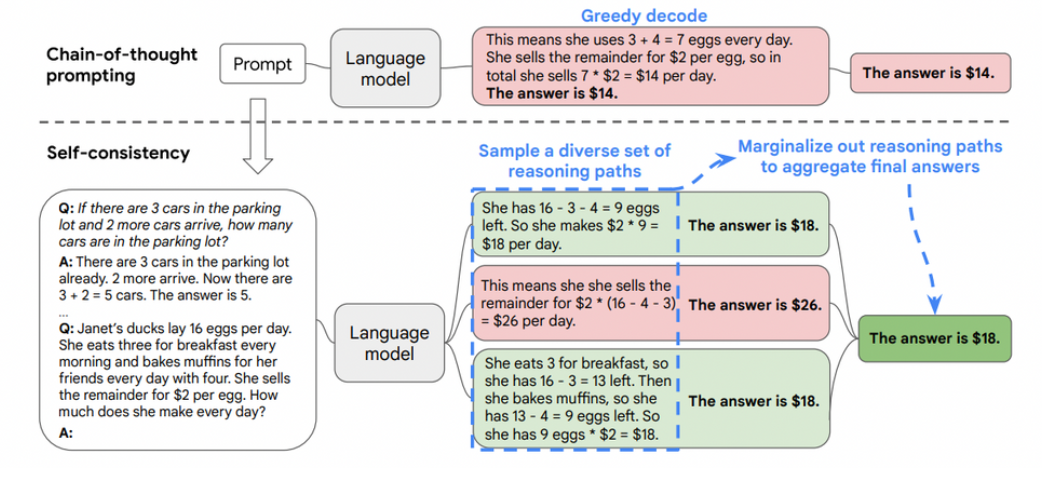

In [18]:
# Example
system_pro = "Classify the above email as IMPORTANT or NOT IMPORTANT as it relates to a software company. Let's think step by step."
user_pro = """Hello,

I have discovered a major security vulnerability in your system. Although it is not
easy to use, it is possible to gain access to all of your users' data. I have attached
a proof of concept. Please fix this issue as soon as possible.

Cheers,

Donny"""

generate_responses(system_pro,user_pro)

'IMPORTANT'

In [19]:
generate_responses(system_pro,user_pro)

'IMPORTANT'

# General Knowledge Prompting

In [20]:
#A common practice prompt engineering is augmenting a query with additional knowledge before sending the final API call to GPT-3 or GPT-4.
#A similar idea was proposed in the paper called Generated Knowledge Prompting for Commonsense Reasoning, except instead of retrieving additional contextual information from an external database (i.e. a vector database) the authors suggest using an LLM to generate its own knowledge and then incorporating that into the prompt to improve common sense reasoning.


## ...we develop generated knowledge prompting, which consists of generating knowledge from a language model, then providing the knowledge as additional input when answering a question. Our method does not require task-specific supervision for knowledge integration, or access to a structured knowledge base, yet it improves performance of large-scale, state-of-the-art models...

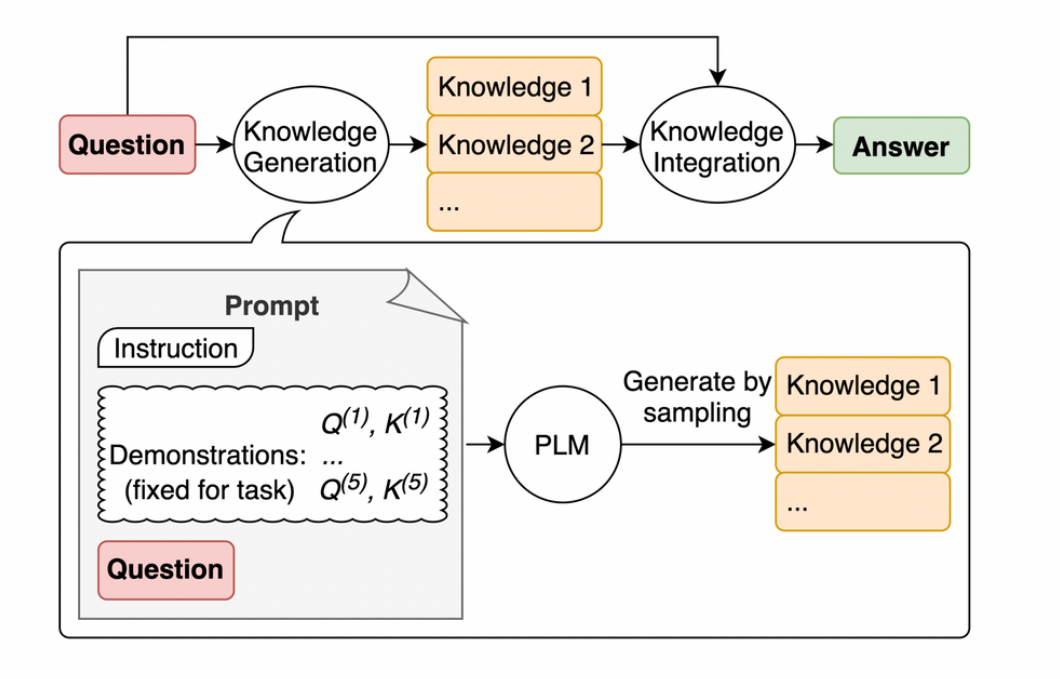

In [21]:
#RAG

# ReAct

## we explore the use of LLMs to generate both reasoning traces and task-specific actions in an interleaved manner, allowing for greater synergy between the two: reasoning traces help the model induce, track, and update action plans as well as handle exceptions, while actions allow it to interface with external sources, such as knowledge bases or environments, to gather additional information.

## In other words, it generating reasoning traces (e.g. chain of thought) to create and update actions plans, while the action and observations allow the model to retrieve information and interact with external tools and knowledge sources.

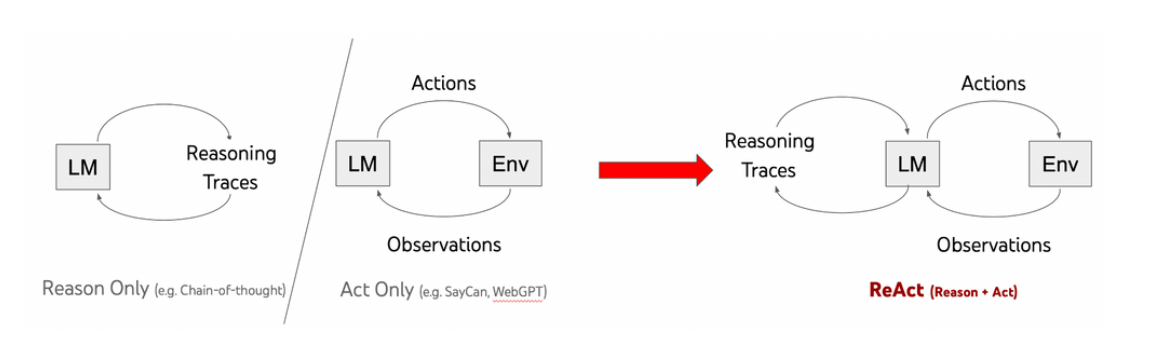